# This Notebook contain the following tasks:
- Data Cleaning.
- Features Selection and Engineering.
- EDA.
- Preprocessing (imputation, outliers handling, Transformation, Encoding, Scaling)
- Assumptions testing for the candidate models.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Feature Documentation Table for COMPAS Dataset (Compass-scores-two-years)

| **Feature**                  | **Explanation**                                                                                   | **Range of Values**                             | **Example**             | **Drop (Yes/No)** |
|------------------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------|-------------------------|-------------------|
| id                           | Unique identifier for each record                                                                | Integer                                        | 12345                  | Yes               |
| name                         | Full name of the individual                                                                      | Text                                           | "John Doe"             | Yes               |
| first                        | First name of the individual                                                                     | Text                                           | "John"                | Yes               |
| last                         | Last name of the individual                                                                      | Text                                           | "Doe"                 | Yes               |
| compas_screening_date        | Date of COMPAS screening                                                                         | Date                                           | "2023-01-01"          | Yes               |
| sex                          | Gender of the individual                                                                         | "Male", "Female"                               | "Male"                | No                |
| dob                          | Date of birth                                                                                   | Date                                           | "1990-05-15"          | Yes               |
| age                          | Age of the individual at the time of screening                                                  | Integer (e.g., 18–70)                          | 35                    | No                |
| age_cat                      | Age category                                                                                    | "Less than 25", "25–45", "Greater than 45"     | "25–45"               | No                |
| race                         | Race of the individual                                                                          | "African-American", "Caucasian", etc.          | "African-American"    | No                |
| juv_fel_count                | Number of juvenile felony charges                                                               | Integer (e.g., 0–10)                           | 2                     | No                |
| decile_score                 | Risk score on a scale of 1 to 10                                                                | Integer (1–10)                                 | 7                     | No                |
| juv_misd_count               | Number of juvenile misdemeanor charges                                                          | Integer (e.g., 0–10)                           | 1                     | No                |
| juv_other_count              | Number of other juvenile charges                                                                | Integer (e.g., 0–10)                           | 3                     | No                |
| priors_count                 | Number of prior offenses                                                                        | Integer (e.g., 0–30)                           | 5                     | No                |
| days_b_screening_arrest      | Days between arrest and COMPAS screening                                                        | Integer (e.g., -500 to 500)                    | 15                    | Yes               |
| c_jail_in                    | Jail entry date for the current charge                                                          | Date                                           | "2023-01-05"          | Yes               |
| c_jail_out                   | Jail release date for the current charge                                                        | Date                                           | "2023-01-10"          | Yes               |
| c_case_number                | Case number for the current charge                                                              | Text                                           | "2023ABC123"          | Yes               |
| c_offense_date               | Offense date for the current charge                                                             | Date                                           | "2022-12-31"          | Yes               |
| c_arrest_date                | Arrest date for the current charge                                                              | Date                                           | "2023-01-01"          | Yes               |
| c_days_from_compas           | Days between the COMPAS screening and current charge                                            | Integer (e.g., -500 to 500)                    | -10                   | Yes               |
| c_charge_degree              | Degree of the current charge                                                                    | "M", "F"                                       | "F"                   | No                |
| c_charge_desc                | Description of the current charge                                                               | Text                                           | "Grand Theft"         | No                |
| is_recid                     | Indicator of whether the individual re-offended                                                 | 0 (No), 1 (Yes)                                | 1                     | No                |
| r_case_number                | Case number for recidivism charges                                                              | Text                                           | "2023REC456"          | Yes               |
| r_charge_degree              | Degree of the recidivism charge                                                                 | "M", "F"                                       | "M"                   | Yes               |
| r_days_from_arrest           | Days from arrest to recidivism charge                                                           | Integer (e.g., -500 to 500)                    | 120                   | Yes               |
| r_offense_date               | Offense date for recidivism charge                                                              | Date                                           | "2023-05-01"          | Yes               |
| r_charge_desc                | Description of the recidivism charge                                                            | Text                                           | "Battery"             | Yes               |
| r_jail_in                    | Jail entry date for recidivism charge                                                           | Date                                           | "2023-06-01"          | Yes               |
| r_jail_out                   | Jail release date for recidivism charge                                                         | Date                                           | "2023-06-05"          | Yes               |
| violent_recid                | Indicator of violent recidivism                                                                 | 0 (No), 1 (Yes)                                | 1                     | No                |
| is_violent_recid             | Another indicator of violent recidivism                                                        | 0 (No), 1 (Yes)                                | 0                     | No                |
| vr_case_number               | Case number for violent recidivism charges                                                     | Text                                           | "2023VIO789"          | Yes               |
| vr_charge_degree             | Degree of the violent recidivism charge                                                        | "M", "F"                                       | "F"                   | Yes               |
| vr_offense_date              | Offense date for violent recidivism charge                                                     | Date                                           | "2023-07-01"          | Yes               |
| vr_charge_desc               | Description of the violent recidivism charge                                                   | Text                                           | "Assault"             | Yes               |
| type_of_assessment           | Type of COMPAS assessment performed                                                            | Text                                           | "Risk of Recidivism"  | No                |
| decile_score                 | Risk score on a scale of 1 to 10                                                                | Integer (1–10)                                 | 8                     | No                |
| score_text                   | Textual representation of the risk score                                                       | "Low", "Medium", "High"                        | "High"                | No                |
| screening_date               | Date of the assessment screening                                                               | Date                                           | "2023-01-01"          | Yes               |
| v_type_of_assessment         | Type of violent risk assessment performed                                                      | Text                                           | "Risk of Violence"    | No                |
| v_decile_score               | Violent risk score on a scale of 1 to 10                                                       | Integer (1–10)                                 | 6                     | No                |
| v_score_text                 | Textual representation of the violent risk score                                               | "Low", "Medium", "High"                        | "Medium"              | No                |
| v_screening_date             | Date of the violent risk assessment                                                            | Date                                           | "2023-02-01"          | Yes               |
| in_custody                   | Jail entry date                                                                                | Date                                           | "2023-01-15"          | Yes               |
| out_custody                  | Jail release date                                                                              | Date                                           | "2023-01-20"          | Yes               |
| priors_count                 | Number of prior offenses (duplicate of earlier column)                                         | Integer (e.g., 0–30)                           | 5                     | Yes               |
| start                        | Start date for the log entry                                                                   | Date                                           | "2023-01-01"          | Yes               |
| end                          | End date for the log entry                                                                     | Date                                           | "2023-01-05"          | Yes               |
| event                        | Event description                                                                              | Text                                           | "Screening"           | Yes               |
| two_year_recid               | Indicator of recidivism within two years                                                       | 0 (No), 1 (Yes)                                | 1                     | No                |


In [70]:
# Replace the file path with the location of your CSV file
file_path = '..\Data\Raw\compas-scores-two-years.csv'

# Read the CSV file into a pandas DataFrame
full_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it's loaded correctly
full_df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


# Initial Features Selection Based on Domain Knowledge

In [71]:
# To see the names of all the columns in the DataFrame
print(full_df.columns)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


In [72]:
features_to_drop = [
    'id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'age',
    'days_b_screening_arrest', 'c_case_number',
    'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'r_case_number', 'r_offense_date', 'violent_recid', 'vr_case_number', 
    'vr_offense_date', 'type_of_assessment', 'decile_score.1', 'screening_date', 'v_screening_date', 'v_type_of_assessment', 'priors_count.1', 'start', 'end', 'event']

# Drop the irrelevant columns
df2 = full_df.drop(columns = features_to_drop)

# Display the resulting DataFrame
df2.head()

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,...,r_jail_out,is_violent_recid,vr_charge_degree,vr_charge_desc,score_text,v_decile_score,v_score_text,in_custody,out_custody,two_year_recid
0,Male,Greater than 45,Other,0,1,0,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,...,NaN,0,NaN,NaN,Low,1,Low,2014-07-07,2014-07-14,0
1,Male,25 - 45,African-American,0,3,0,0,0,2013-01-26 03:45:27,2013-02-05 05:36:53,...,NaN,1,(F3),Felony Battery (Dom Strang),Low,1,Low,2013-01-26,2013-02-05,1
2,Male,Less than 25,African-American,0,4,0,1,4,2013-04-13 04:58:34,2013-04-14 07:02:04,...,2013-06-16,0,NaN,NaN,Low,3,Low,2013-06-16,2013-06-16,1
3,Male,Less than 25,African-American,0,8,1,0,1,NaN,NaN,...,NaN,0,NaN,NaN,High,6,Medium,NaN,NaN,0
4,Male,25 - 45,Other,0,1,0,0,2,NaN,NaN,...,NaN,0,NaN,NaN,Low,1,Low,NaN,NaN,0


# Feature Engineering: Converting the dates in and out into periods

In [73]:
# Calculating the c_stay_length from the jail in and jail out dates

df2['c_jail_in'] = pd.to_datetime(df2['c_jail_in'])
df2['c_jail_out'] = pd.to_datetime(df2['c_jail_out'])

#Making sure that the c_jail_out hours are treated as PM if they are less than the hours of c_jail_in
df2['c_jail_out'] = df2.apply(lambda x: x['c_jail_out'] + pd.DateOffset(days=1) if x['c_jail_out'] < x['c_jail_in'] else x['c_jail_out'], axis=1)
df2['c_length_of_stay'] = df2['c_jail_out'] - df2['c_jail_in']

# Converting the length of stay to days and fraction of days rounded to 2 decimal places
df2['c_length_of_stay'] = df2['c_length_of_stay'].dt.total_seconds() / (24 * 3600)
df2['c_length_of_stay'] = df2['c_length_of_stay'].round(2)



In [74]:
# Calculating the r_stay_length from the r_jail_in and r_jail_out dates

df2['r_jail_in'] = pd.to_datetime(df2['r_jail_in'])
df2['r_jail_out'] = pd.to_datetime(df2['r_jail_out'])

#Making sure that the c_jail_out hours are treated as PM if they are less than the hours of c_jail_in
df2['r_jail_out'] = df2.apply(lambda x: x['r_jail_out'] + pd.DateOffset(days=1) if x['r_jail_out'] < x['r_jail_in'] else x['r_jail_out'], axis=1)
df2['r_length_of_stay'] = df2['r_jail_out'] - df2['r_jail_in']

# Converting the length of stay to days and fraction of days rounded to 2 decimal places
df2['r_length_of_stay'] = df2['r_length_of_stay'].dt.total_seconds() / (24 * 3600)
df2['r_length_of_stay'] = df2['r_length_of_stay'].round(2)


In [75]:
df2['in_custody'] = pd.to_datetime(df2['in_custody'])
df2['out_custody'] = pd.to_datetime(df2['out_custody'])

#Making sure that the c_jail_out hours are treated as PM if they are less than the hours of c_jail_in
df2['out_custody'] = df2.apply(lambda x: x['out_custody'] + pd.DateOffset(days=1) if x['out_custody'] < x['in_custody'] else x['out_custody'], axis=1)
df2['custody_length_of_stay'] = df2['out_custody'] - df2['in_custody']

# Converting the length of stay to days and fraction of days rounded to 2 decimal places
df2['custody_length_of_stay'] = df2['custody_length_of_stay'].dt.total_seconds() / (24 * 3600)
df2['custody_length_of_stay'] = df2['custody_length_of_stay'].round(2)


In [76]:
# Drop the individual dates
df2 = df2.drop(columns = ['c_jail_in', 'c_jail_out', 'r_jail_in', 'r_jail_out', 'in_custody', 'out_custody'])


In [77]:
# decile_score, score_text, v_decile_score are outputs of the COMPAS algorithm and should not be used as targets to train my model.
# Because doing so would mean that I am training my model to mimic the COMPAS algorithm model which is biased.
# two_year_recid is the target variable that I will use to train my model, because it is an actual output as a result of tracking the individuals for two years.
potential_targets = ['decile_score', 'score_text','v_decile_score', 'v_score_text', 'two_year_recid']
actual_target = 'two_year_recid'
target = df2[actual_target].astype('category')
features = df2.drop(potential_targets ,axis = 1)
target




0       0
1       1
2       1
3       0
4       0
       ..
7209    0
7210    0
7211    0
7212    0
7213    1
Name: two_year_recid, Length: 7214, dtype: category
Categories (2, int64): [0, 1]

In [78]:
features.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,c_length_of_stay,r_length_of_stay,custody_length_of_stay
0,Male,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,0,NaN,NaN,0.98,NaN,7.0
1,Male,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1,(F3),NaN,Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),10.08,NaN,10.0
2,Male,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1,(M1),0.0,Driving Under The Influence,0,NaN,NaN,1.09,0.0,0.0
3,Male,Less than 25,African-American,0,1,0,1,F,Possession of Cannabis,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,Male,25 - 45,Other,0,0,0,2,F,arrest case no charge,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [79]:
# investigating unique values in each column
for column in features.columns:
    unique_values = df2[column].unique()
    print(f"{column}: {unique_values}")


sex: ['Male' 'Female']
age_cat: ['Greater than 45' '25 - 45' 'Less than 25']
race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']
juv_fel_count: [ 0  2  1  8  4  3  9 20  6  5 10]
juv_misd_count: [ 0  1  6 12  2  4  3  8  5 13]
juv_other_count: [ 0  1  2  3  4 17  9  5  6  7]
priors_count: [ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]
c_charge_degree: ['F' 'M']
c_charge_desc: ['Aggravated Assault w/Firearm' 'Felony Battery w/Prior Convict'
 'Possession of Cocaine' 'Possession of Cannabis' 'arrest case no charge'
 'Battery' 'Possession Burglary Tools' 'Insurance Fraud'
 'Poss 3,4 MDMA (Ecstasy)' 'Poss3,4 Methylenedioxymethcath'
 'Felony Driving While Lic Suspd' 'Grand Theft in the 3rd Degree'
 'Driving While License Revoked' 'Possession Of Heroin'
 'Battery on Law Enforc Officer' 'Possession Of Methamphetamine'
 'Introduce Contraband Into Jail' 'Lewd/Lasc Battery Pers 12+/<16'
 'Susp Driv

In [80]:
# saving the df2 to a new csv file
#df2.to_csv('..\Data\Processed\compas-scores-two-years-processed.csv', index=False)

In [81]:
# Investigating missing values in the dataset
print(features.shape)
print(features.isnull().sum())

(7214, 19)
sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc               29
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        4898
r_charge_desc             3801
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay           307
r_length_of_stay          4898
custody_length_of_stay     236
dtype: int64


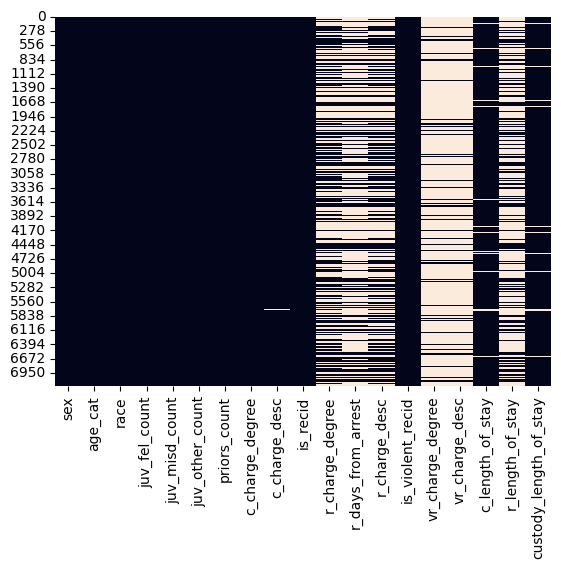

In [82]:
# Visulaizing missing values in the dataset using a heatmap
cmap = sns.mpl_palette("Set2", 2)
sns.heatmap(features.isna(),cbar = False)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

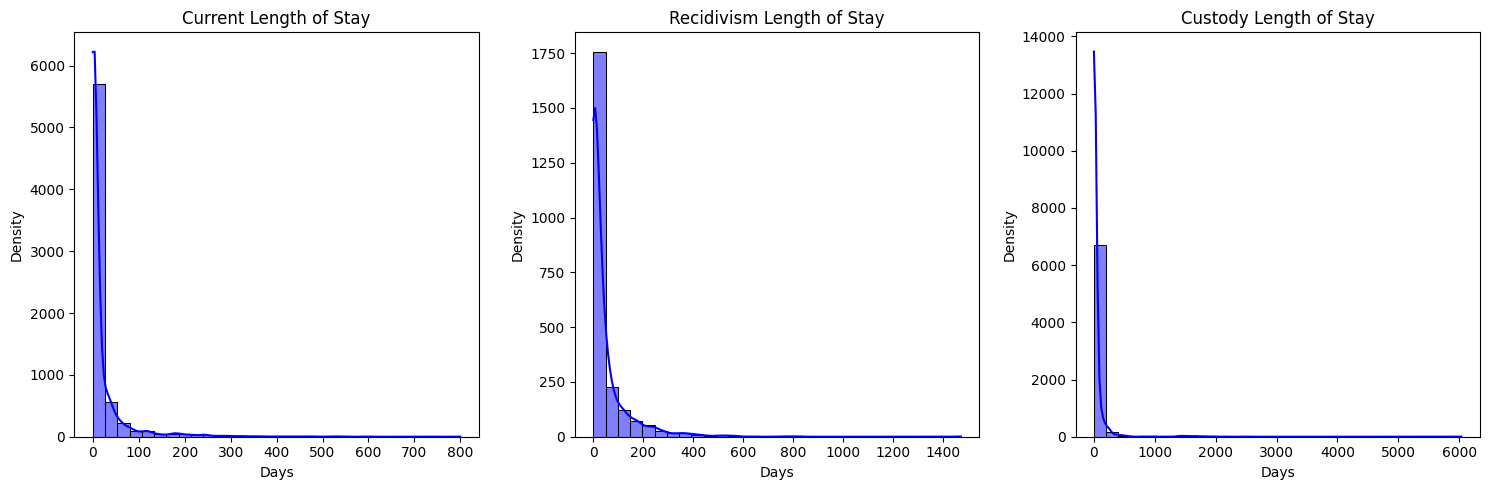

In [83]:
# visualize the distribution of the 3 duration features to decide how to handle the missing values

# Set figure size
plt.figure(figsize=(15, 5))

# Feature names
duration_features = ['c_length_of_stay', 'r_length_of_stay', 'custody_length_of_stay']
titles = ['Current Length of Stay', 'Recidivism Length of Stay', 'Custody Length of Stay']

# Loop through features and create subplots
for i, feature in enumerate(duration_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(features[feature], kde=True, color='blue', bins=30)
    plt.title(titles[i])
    plt.xlabel('Days')
    plt.ylabel('Density')

# Show plot
plt.tight_layout()
plt.show()



In [84]:
# Since the three duration features are right-skewed, I will use the median to fill the missing values
features['c_length_of_stay'] = features['c_length_of_stay'].fillna(features['c_length_of_stay'].median())
features['custody_length_of_stay'] = features['custody_length_of_stay'].fillna(features['custody_length_of_stay'].median())

# features['r_length_of_stay'] = features['r_length_of_stay'].fillna(features['r_length_of_stay'].median())
# we leave the recidivism length of stay as it is for now, because its missing values may depend on is_recid


features.isnull().sum()

sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc               29
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        4898
r_charge_desc             3801
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          4898
custody_length_of_stay       0
dtype: int64

In [85]:
# Only c_charge_desc has missing values that need to be imputed
# r_charge_desc doesn't need imputation since the missing 3801 values are expected for individuals who have is_recid = 0
# vr_charge_degree, vr_charge_desc follow the same pattern as they have each 6395 missing values for individuals who have is violent_recid = 0


# When imputing the missing values in c_charge_desc, we can use the most frequent value in the column conditioned on the value of c_charge_degree[M,F]
# This is because the charge description depends on the charge degree

def impute_charge_desc(group):
    mode_value = group.mode()[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

features['c_charge_desc'] = features.groupby('c_charge_degree')['c_charge_desc'].transform(impute_charge_desc)
features.isnull().sum()


sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc                0
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        4898
r_charge_desc             3801
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          4898
custody_length_of_stay       0
dtype: int64

In [86]:
# Now we are going to impute the missing values for vr_ charge_degree and vr_charge_desc with 'Not Applicable' since the missing values are for individuals who have is_violent_recid = 0
# but the imputation is conditional on the value of is_violent_recid = 0
# r_charge_desc doesn't need imputation since the missing 3801 values are expected for individuals who have is_recid = 0

# it is not a good idea to use a placeholder value of -1 for r_days_from_arrest for individuals who have is_recid = 0
# because the -1 and 'Not Applicable' values will be treated as valid values by the model
# so we will leave the missing values in r_days_from_arrest as they are for now

#features.loc[features['is_recid'] == 0, ['r_charge_degree','r_charge_desc']] = 'Not Applicable'

# use a placeholder value of -1 for r_days_from_arrest for individuals who have is_recid = 0. -1 is better than 0 because 0 is a valid value
# for r_days_from_arrest for some individuals who have is_recid = 1
#features.loc[features['is_recid'] == 0, ['r_days_from_arrest']] = -1

# do the same for r_length_of_stay
#features.loc[features['is_recid'] == 0, ['r_length_of_stay']] = -1

#features.loc[features['is_violent_recid'] == 0, ['vr_charge_degree', 'vr_charge_desc']] = 'Not Applicable'

# Investigating missing values in the dataset
print(features.shape)
print(features.isnull().sum())

(7214, 19)
sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc                0
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        4898
r_charge_desc             3801
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          4898
custody_length_of_stay       0
dtype: int64


In [87]:
# for r_charge_degree, r_charge_desc, vr_charge_degree, vr_charge_desc we are going to only impute the missing values for individuals who have is_recid = 1
# because the missing values for individuals who have is_recid = 0 are expected and should be left as they are to be handled by the model
# we will use the most frequent value in the column to impute the missing values

# the missing values for r_charge_degree is imputed with the most frequent value, excluding the missing values
most_frequent_value_r_charge_degree = features['r_charge_degree'].mode()[0]
# then we impute only the missing values for individuals who have is_recid = 1
features.loc[(features['r_charge_degree'].isnull()) & (features['is_recid'] == 1), 'r_charge_degree'] = most_frequent_value_r_charge_degree

# the missing values for r_charge_desc is imputed with the most frequent value, but conditioned on the value of r_charge_degree
def impute_r_charge_desc(group):
    mode_value = group.mode()[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

# now we impute only the missing values for individuals who have is_recid = 1

features['r_charge_desc'] = features.groupby('r_charge_degree')['r_charge_desc'].transform(impute_r_charge_desc)

# the missing values for vr_charge_degree is imputed with the most frequent value, excluding the missing values
most_frequent_value_vr_charge_degree = features['vr_charge_degree'].mode()[0]
# then we impute only the missing values for individuals who have is_violent_recid = 1
features.loc[(features['vr_charge_degree'].isnull()) & (features['is_violent_recid'] == 1), 'vr_charge_degree'] = most_frequent_value_vr_charge_degree

# the missing values for vr_charge_desc is imputed with the most frequent value, but conditioned on the value of vr_charge_degree
def impute_vr_charge_desc(group):
    mode_value = group.mode()[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

# now we impute only the missing values for individuals who have is_violent_recid = 1
features['vr_charge_desc'] = features.groupby('vr_charge_degree')['vr_charge_desc'].transform(impute_vr_charge_desc)

# Investigating missing values in the dataset
print(features.shape)
features.isnull().sum()


 

(7214, 19)


sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc                0
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        4898
r_charge_desc             3743
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          4898
custody_length_of_stay       0
dtype: int64

In [88]:
# save features df to a new csv file
#features.to_csv('..\Data\Processed\compas-scores-two-years-processed-features.csv', index=False)

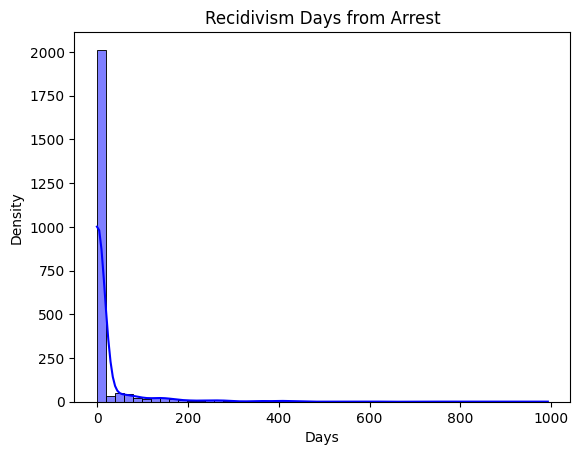

In [89]:
# Now, lets impute the missing values in r_days_from_arrest, but first we plot the distribution of the feature to decide how to impute the missing values
sns.histplot(features['r_days_from_arrest'], kde=True, color='blue', bins=50)
plt.title('Recidivism Days from Arrest')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()  


In [90]:
# since the feature is right-skewed, we will use the median to fill the missing values
# we will use the median value of the feature excluding the missing values
median_value = features['r_days_from_arrest'].median()

# then we only impute the missing values for individuals who have is_recid = 1
features.loc[(features['r_days_from_arrest'].isnull()) & (features['is_recid'] == 1), 'r_days_from_arrest'] = median_value

# Investigating missing values in the dataset
features.isnull().sum()


sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc                0
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        3743
r_charge_desc             3743
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          4898
custody_length_of_stay       0
dtype: int64

In [91]:
# you can see from the three plots we made earlier that the distribution of the three duration features is right-skewed, including the recidivism length of stay
# so we will use the median to fill the missing values
# we will use the median value of the feature excluding the missing values
median_value_r_length_of_stay = features['r_length_of_stay'].median()

# then we only impute the missing values for individuals who have is_recid = 1
features.loc[(features['r_length_of_stay'].isnull()) & (features['is_recid'] == 1), 'r_length_of_stay'] = median_value_r_length_of_stay

# Investigating missing values in the dataset
features.isnull().sum()

sex                          0
age_cat                      0
race                         0
juv_fel_count                0
juv_misd_count               0
juv_other_count              0
priors_count                 0
c_charge_degree              0
c_charge_desc                0
is_recid                     0
r_charge_degree           3743
r_days_from_arrest        3743
r_charge_desc             3743
is_violent_recid             0
vr_charge_degree          6395
vr_charge_desc            6395
c_length_of_stay             0
r_length_of_stay          3743
custody_length_of_stay       0
dtype: int64

In [92]:
# save features df to a new csv file
features.to_csv('..\Data\Processed\compas-scores-two-years-processed.csv', index=False)

In [93]:
# After imputing the missing values, we Perform EDA

In [94]:
# First, lets make sure that is_recid and is_violent_recid are categorical features
features['is_recid'] = features['is_recid'].astype('category')
features['is_violent_recid'] = features['is_violent_recid'].astype('category')

# Dividing the features into categorical and numerical features
categorical_features = features.select_dtypes(include=['object', 'category'])
numerical_features = features.select_dtypes(include=['int64', 'float64'])

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

features.dtypes


Categorical Features:          sex          age_cat              race c_charge_degree  \
0       Male  Greater than 45             Other               F   
1       Male          25 - 45  African-American               F   
2       Male     Less than 25  African-American               F   
3       Male     Less than 25  African-American               F   
4       Male          25 - 45             Other               F   
...      ...              ...               ...             ...   
7209    Male     Less than 25  African-American               F   
7210    Male     Less than 25  African-American               F   
7211    Male  Greater than 45             Other               F   
7212  Female          25 - 45  African-American               M   
7213  Female     Less than 25          Hispanic               F   

                       c_charge_desc is_recid r_charge_degree  \
0       Aggravated Assault w/Firearm        0             NaN   
1     Felony Battery w/Prior Convict       

sex                         object
age_cat                     object
race                        object
juv_fel_count                int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
c_charge_degree             object
c_charge_desc               object
is_recid                  category
r_charge_degree             object
r_days_from_arrest         float64
r_charge_desc               object
is_violent_recid          category
vr_charge_degree            object
vr_charge_desc              object
c_length_of_stay           float64
r_length_of_stay           float64
custody_length_of_stay     float64
dtype: object

In [95]:
# investigating the descriptive statistics of the numerical features
numerical_features.describe(include=[int, float])


,juv_fel_count,juv_misd_count,juv_other_count,priors_count,r_days_from_arrest,c_length_of_stay,r_length_of_stay,custody_length_of_stay
count,7214.000000,7214.000000,7214.000000,7214.000000,3471.000000,7214.000000,3471.000000,7214.000000
mean,0.067230,0.090934,0.109371,3.472415,13.524633,18.009825,33.065687,43.859856
std,0.473972,0.485239,0.501586,4.882538,61.896021,50.095539,75.481946,192.799165
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.920000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,1.280000,8.000000,2.000000
75%,0.000000,0.000000,0.000000,5.000000,0.000000,8.677500,26.000000,22.000000
max,20.000000,13.000000,17.000000,38.000000,993.000000,799.790000,1471.000000,6035.000000


In [96]:
# we that that for r_days_from_arrest and r_length_of_stay, the values of min, 25%, 50%, 75%, and max are dominated by the placeholder value of -1
# we could have used np.nan as a placeholder value, if the model we are going to use can handle missing values
# but since we are going to use an sklearn implementation of of RF, we have to use a placeholder value that is not np.nan
# our missing values here are structural, by design.

# other possible solutions than the -1 and not applicable values are: (since those values might be treated as real values or meninigful categories by the model)
# 1. use a missing indicatior column for each feature to indicate if the value is missing or not
# 2. use RF implementation that can handle missing values like xgboost, lightgbm, catboost (without need for placeholder values, or missing indicator columns)
# 3. use a placeholder value that is not in the range of the feature values like -9999

### conclusion: WE handel the issue of structural missing values by leaving them as NaN and use an implementatoion of RF that deals with missing values graciously like XGBoost, lightGBM.

In [97]:
# investigating the descriptive statistics of the categorical features
categorical_features.describe(include=[object, 'category'])

,sex,age_cat,race,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc
count,7214,7214,7214,7214,7214,7214,3471,3471,7214,819,819
unique,2,3,6,2,437,2,10,340,2,9,83
top,Male,25 - 45,African-American,F,Battery,0,(M1),Possess Cannabis/20 Grams Or Less,0,(M1),Battery
freq,5819,4109,3696,4666,1179,3743,1201,278,6395,344,329


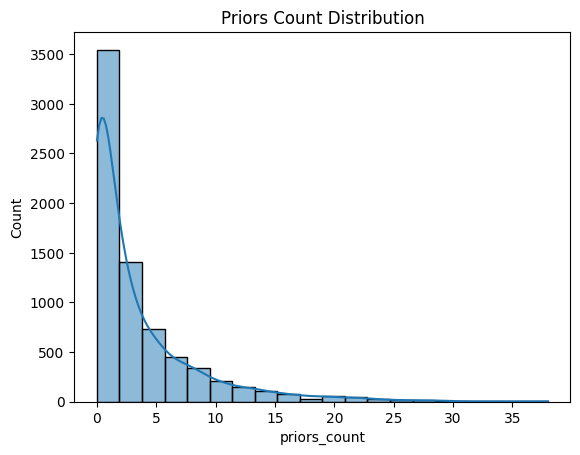

In [98]:
# Visualizing the distribution of the numerical features
# This allows us to see the distribution of the numerical features and check for outliers and skewness

# Distribution for priors_count
sns.histplot(features['priors_count'], bins=20, kde=True)
plt.title('Priors Count Distribution')
plt.show()

In [99]:
full_df = pd.concat([features, target], axis=1)
full_df.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,c_length_of_stay,r_length_of_stay,custody_length_of_stay,two_year_recid
0,Male,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,0,NaN,NaN,0.98,NaN,7.0,0
1,Male,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1,(F3),0.0,Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),10.08,8.0,10.0,1
2,Male,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1,(M1),0.0,Driving Under The Influence,0,NaN,NaN,1.09,0.0,0.0,1
3,Male,Less than 25,African-American,0,1,0,1,F,Possession of Cannabis,0,NaN,NaN,NaN,0,NaN,NaN,1.28,NaN,2.0,0
4,Male,25 - 45,Other,0,0,0,2,F,arrest case no charge,0,NaN,NaN,NaN,0,NaN,NaN,1.28,NaN,2.0,0


<Figure size 1000x600 with 0 Axes>

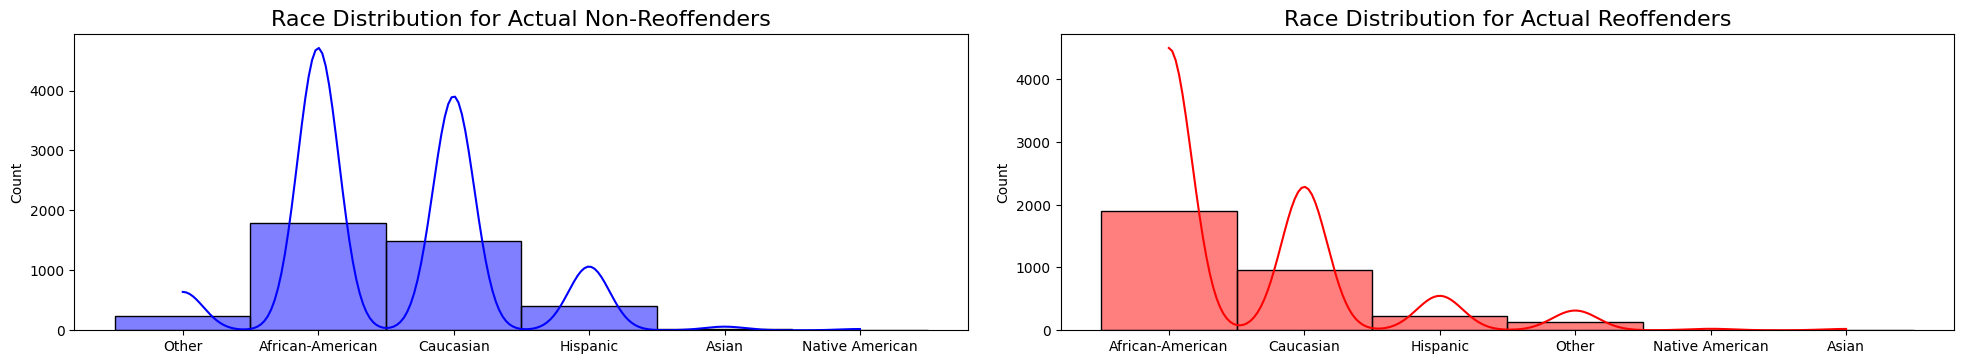

In [100]:
# Visualizing the distribution of Race conditioned on the two_year_recid
plt.figure(figsize=(10, 6))

class_1= full_df[full_df['two_year_recid'] == 0]['race'].values
class_2= full_df[full_df['two_year_recid'] == 1]['race'].values 

fig, ax = plt.subplots(1, 2, figsize=(20,4)) 

sns.histplot(class_1,kde = True, ax=ax[0], color= 'blue')
ax[0].set_title("Race Distribution for Actual Non-Reoffenders", fontsize=16) 

sns.histplot(class_2,kde = True, ax=ax[1], color= 'red')
ax[1].set_title("Race Distribution for Actual Reoffenders", fontsize=16) 

fig.tight_layout(pad=2.0)
plt.show()

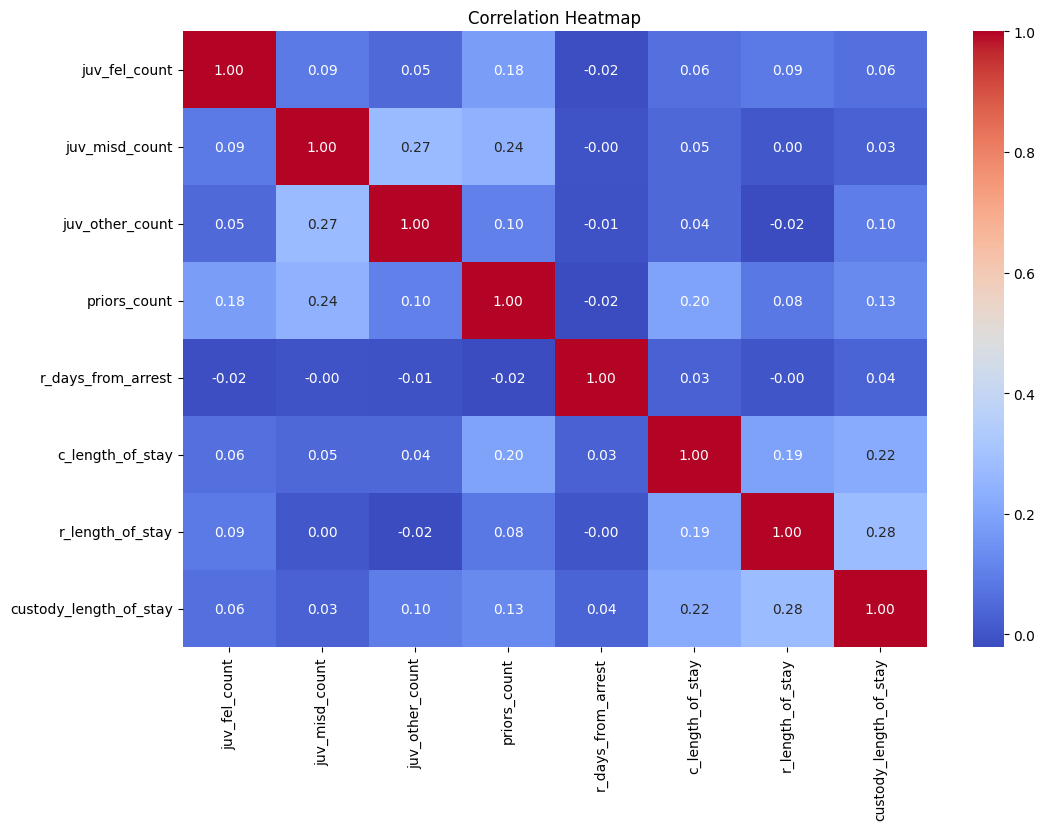

In [101]:
# Check correlation between features and target
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [102]:

# Group by race and calculate recidivism rates
#Analyze whether certain groups (like races or age categories) have disproportionately high recidivism rates.
recidivism_rates = full_df.groupby('race')['two_year_recid']
print(recidivism_rates.value_counts(normalize=True))


race              two_year_recid
African-American  1                 0.514340
                  0                 0.485660
Asian             0                 0.718750
                  1                 0.281250
Caucasian         0                 0.606357
                  1                 0.393643
Hispanic          0                 0.635793
                  1                 0.364207
Native American   1                 0.555556
                  0                 0.444444
Other             0                 0.647215
                  1                 0.352785
Name: proportion, dtype: float64


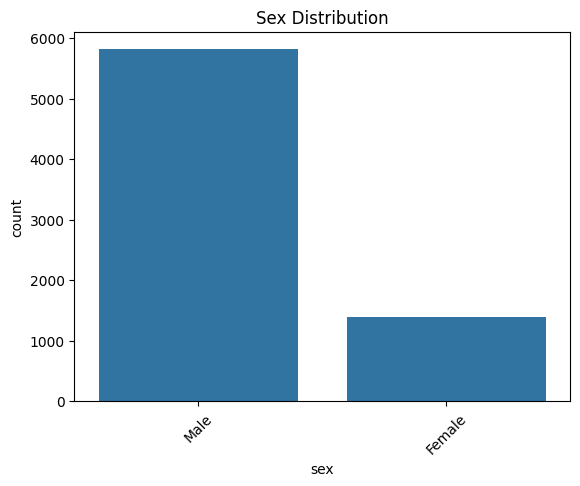

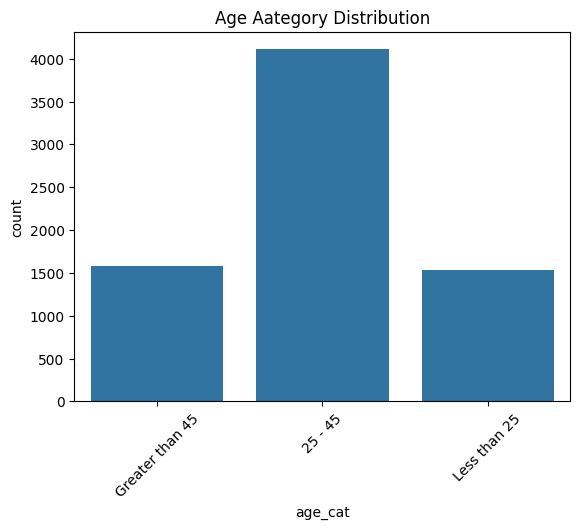

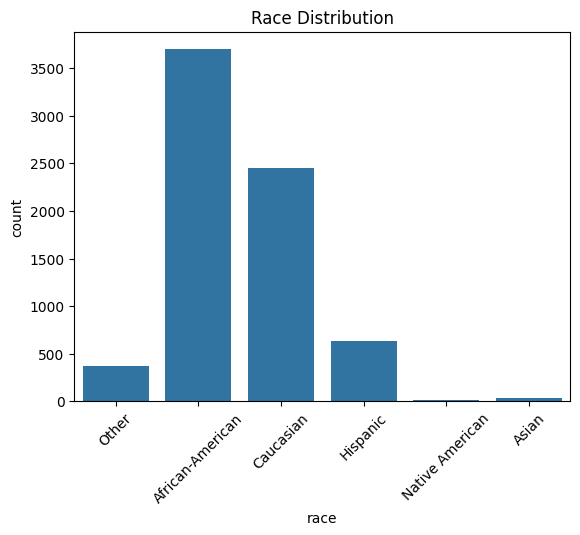

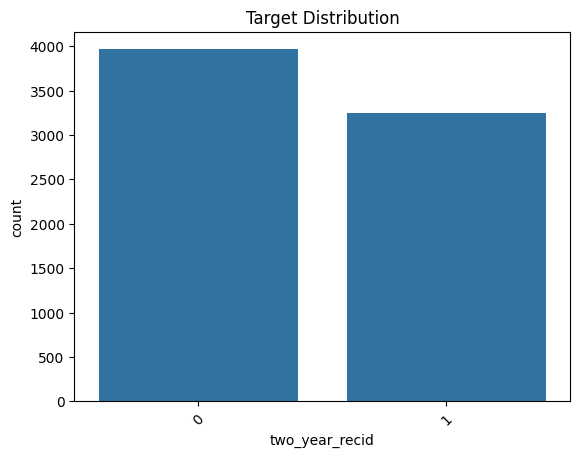

In [103]:
# Now, We check for bias in the dataset as the first step in the fairness analysis


# First we check for different group sizes as a proxy for bias

# Count plot for sex
sns.countplot(x='sex', data=features)
plt.title('Sex Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for Age Categories
sns.countplot(x='age_cat', data=features)
plt.title('Age Aategory Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for race
sns.countplot(x='race', data=features)
plt.title('Race Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for two_year_recid
sns.countplot(x='two_year_recid' , data=df2)
plt.title('Target Distribution')
plt.xticks(rotation=45) 
plt.show()




In [104]:
# The dataset is imbalanced as there are: more african americans than other, there are more males than females, and there are more individuals
# who did not recidivate than those who did recidivate
# The age categories are also not balanced, with '25 - 45' having the highest number of individuals


# Possible Solution: Resampling the dataset to balance the classes.
# We can use the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class and make the classes balanced.

# we can also use regularisation techniques to penalize the model for misclassifying the minority class more than the majority class
# Training different classifiers on different groups?????????????

# But first, check for real behavioral differences between the groups, and if there are none, then we can proceed with resampling



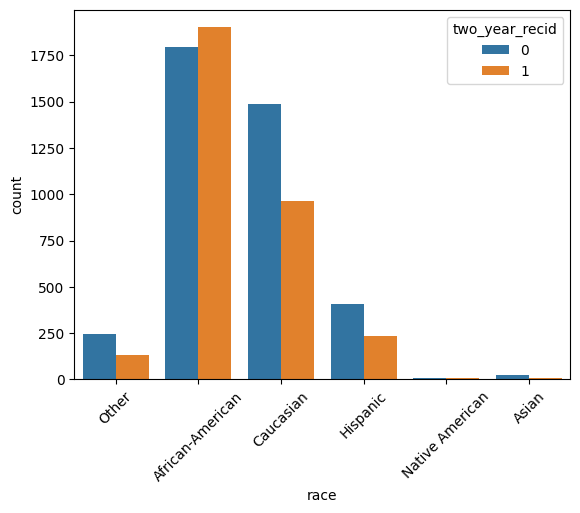

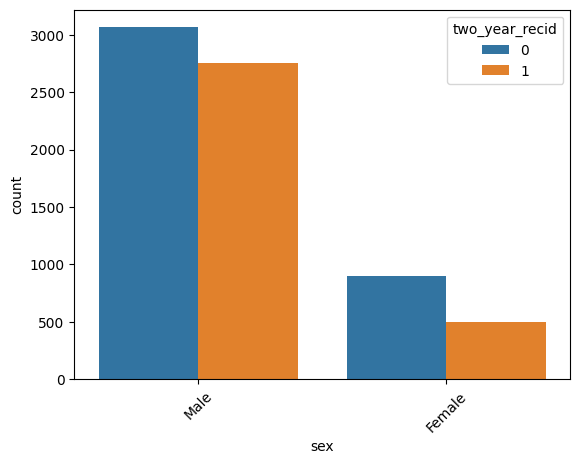

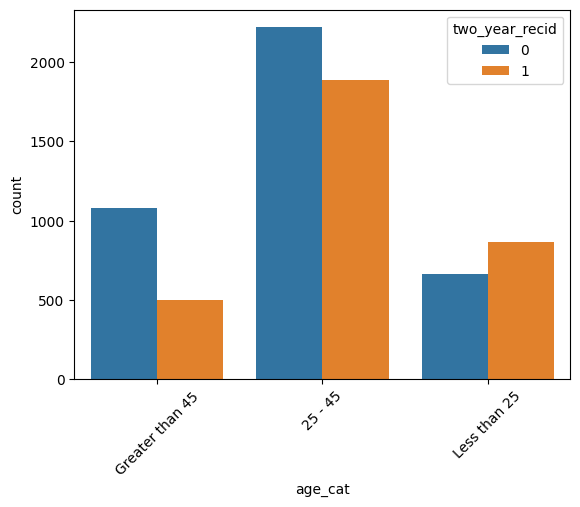

In [105]:
# Next, we check for bias in the dataset by analyzing the recidivism rates for different groups

sns.countplot(x='race', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

sns.countplot(x='sex', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

sns.countplot(x='age_cat', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

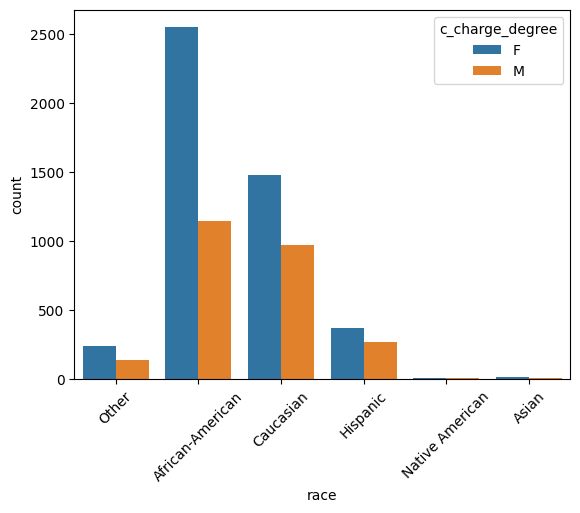

In [106]:
# Lets analyze the charge degree for different groups
sns.countplot(x='race', hue='c_charge_degree', data=full_df)
plt.xticks(rotation=45)
plt.show()


In [107]:
# Now, lets check the Definition of metrics as a potential source of bias in the dataset
# 1. How the reoffense two_year_recid    is defined is it charging, conviction, or just arrest which reflect policing practices rather than actual criminal behavior
# 2. How the categories are grouped for age and others for race, since a broad category might miss important differences between groups
# 3. why the period of two years was chosen to measure recidivism, and not a longer(might exaggerate risk) or shorter period (too short to capture actual recidivism)


# Now lets check the potential bias that might come from the Codebook: How data was recorded, to do so we have to
# go back to the documentation of the dataset and ask the following questions:
# 1. How were the sensitive attributes collected? Were they self-reported or observed?
# 2. Were the sensitive attributes collected by the same person who collected the criminal history features?
# 3. Ambiguity in the definitions: do proir counts include arrests or convictions?


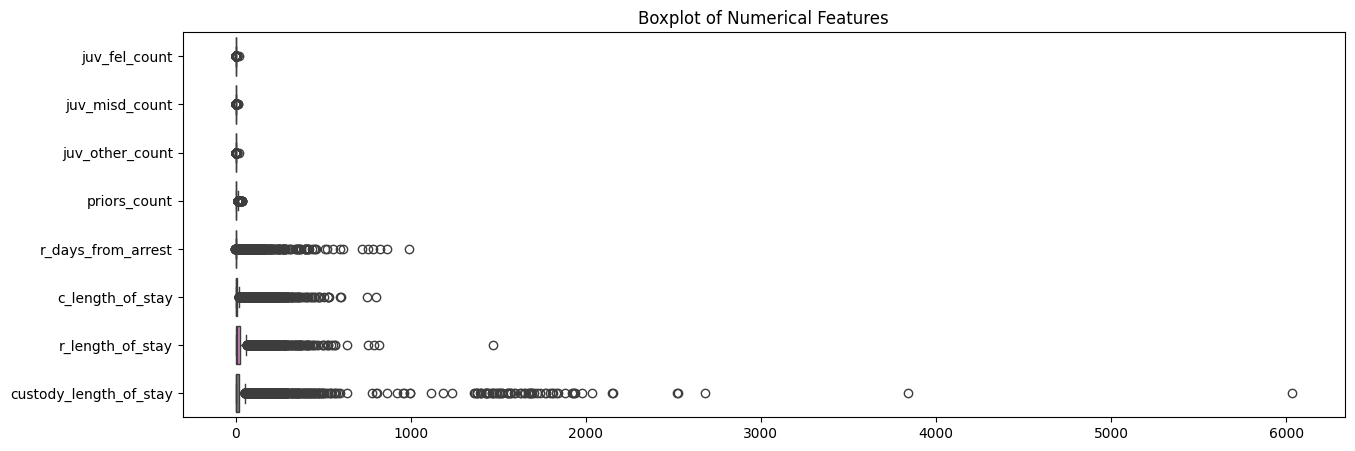

In [108]:
# We can examin the existance of outliers in the dataset for numerical features by using boxplots for all numerical features in the same plot
# each feature should have a different scale, so the boxplots will be on different scales
plt.figure(figsize=(15, 5))
sns.boxplot(data=numerical_features, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()



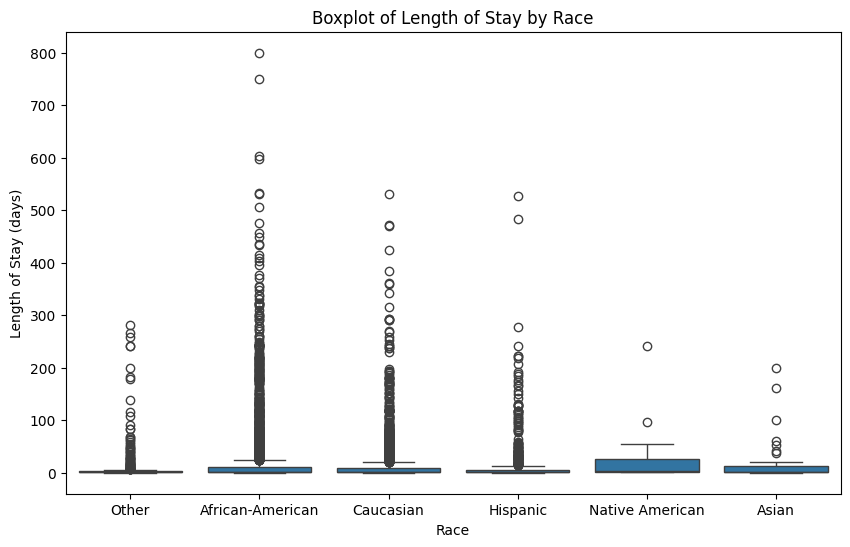

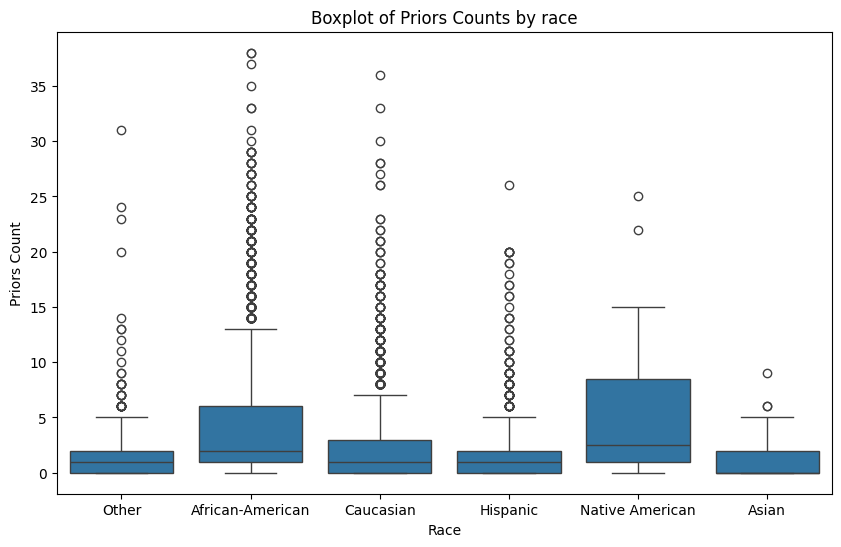

In [109]:
# A more detailed look at the outliers in the length of stay for different groups, this might indicate bias in the treatment of different groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='c_length_of_stay', data=features)
plt.title("Boxplot of Length of Stay by Race")
plt.xlabel("Race")
plt.ylabel("Length of Stay (days)")
plt.show()

# A more detailed look at the outliers in the priors count for different groups, this might indicate targeted policing of certain groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='priors_count', data=features)
plt.title("Boxplot of Priors Counts by race")
plt.xlabel("Race")
plt.ylabel("Priors Count")
plt.show()

### We dont need to apply log_transformaiton or handel outliers because RFs handel the outliers well.

In [110]:
# # apply log transformatioin 
# numerical_columns  = numerical_features.columns

# # Plot original and log-transformed distributions
# plt.figure(figsize=(15, 10))

# for i, feature in enumerate(numerical_columns):
#     # Original distribution
#     plt.subplot(len(numerical_columns), 2, 2 * i + 1)
#     sns.histplot(features[feature], bins=30, kde=True)
#     plt.title(f"Original {feature}")

#     # Log-transformed distribution
#     plt.subplot(len(numerical_columns), 2, 2 * i + 2)
#     sns.histplot(features[f'{feature}_log'], bins=30, kde=True)
#     plt.title(f"Log-Transformed {feature}")

# plt.tight_layout()
# plt.show()

In [111]:
# Attention
features.columns

Index(['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'r_charge_degree', 'r_days_from_arrest', 'r_charge_desc',
       'is_violent_recid', 'vr_charge_degree', 'vr_charge_desc',
       'c_length_of_stay', 'r_length_of_stay', 'custody_length_of_stay'],
      dtype='object')

In [112]:
# Earlier we imputed the missing values in the dataset using simple imputation techniques: mode for categorical features and median for numerical features
# WE might want to use more advanced imputation techniques like KNN imputation to impute the missing values in the dataset
# Random Forest imputation can also be used to impute the missing values in the dataset: for numerical and categorical features separately
# Unlike KNN imputer, the latter requires hyperparameter tuning to get the best results


# Starting with logistic regression since it is inherently interpretable, Checking for assumptions of logistic regression

In [113]:
# 1. checking the assumtion of multicolinearity

# from the correlation matrix we have drwn earlier, there is no high correlation between numerical features
# we expect the same from VIF calculations



# Calculate Variance Inflation Factor (VIF), A VIF above 5 or 10 suggests a high correlation with other predictors, indicating multicollinearity issues.
# If found, consider removing or combining highly correlated features.

# Create a DataFrame with only numerical features
X = numerical_features  

# Create a DataFrame to store VIF values, but first we have to drop the missing values

X = X.dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for numerical features:")
print(vif_data)


VIF values for numerical features:
                  Feature       VIF
0           juv_fel_count  1.065970
1          juv_misd_count  1.208537
2         juv_other_count  1.163136
3            priors_count  1.394165
4      r_days_from_arrest  1.023168
5        c_length_of_stay  1.251288
6        r_length_of_stay  1.261735
7  custody_length_of_stay  1.199739


In [114]:
#2. Assumption: Linearity of the Logit
#Logistic regression assumes that the log-odds (logit transformation) of the dependent variable is linearly related to the independent variables.
#We can check this using a Box-Tidwell test.





# we cant check th assumptions made by the logistic regression becauze the data have too many structural missing values
# the functions for checking each assumption depend on the data having no missing values, so we drop the missing values

# when we check the linerarity of the logits assumption, we exclude the categorical features since they are not continuous

full_df2=full_df.dropna(axis=0)

df_num = full_df2.select_dtypes(include=['number']).copy()  # Select only numeric features
df_num = df_num.dropna()  # Drop missing

# Add a small constant to avoid log(0) issues
df_log = np.log(df_num + 1e-5)  

# Create interaction terms (feature * log(feature))
df_interaction = df_num * df_log  
df_interaction.columns = [f"{col}_log_interact" for col in df_num.columns]

# Combine original features with interaction terms
df_test = pd.concat([df_num, df_interaction], axis=1)
df_test['intercept'] = 1  # Add intercept

# Fit logistic regression model
logit_model = sm.Logit(full_df2['two_year_recid'], df_test)
result = logit_model.fit()

# Show summary
print(result.summary())





c:\Users\MSii\Desktop\my_project\XAIentists\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


MissingDataError: exog contains inf or nans

In [ ]:
# 3. Assumption: No Perfect Separation
#Logistic regression does not work well if a predictor variable perfectly predicts the outcome (e.g., a feature that is 0 when the target is 0 and 1 when the target is 1).
#We can check for this by looking at contingency tables.

for feature in categorical_features:
    print(f"\nCrosstab for {feature} vs two_year_recid:")
    print(pd.crosstab(full_df[feature], full_df['two_year_recid']))
    
    
# Analyzing Your Crosstabs for Perfect Separation
# ✅ No strong evidence of perfect separation, but some concerns:
# from the crosstab, we see that only is_recid is a suspect of perfect separation, but it is not a perfect separation since we have 220 individuals who have is_recid = 1 and two_year_recid = 0


#Crosstab for is_recid vs two_year_recid:
#two_year_recid     0     1
#is_recid                  
#0               3743     0
#1                220  3251

# conclusion: the assumption of no perfect separation holds for the dataset


Crosstab for sex vs two_year_recid:
two_year_recid     0     1
sex                       
Female           897   498
Male            3066  2753

Crosstab for age_cat vs two_year_recid:
two_year_recid      0     1
age_cat                    
25 - 45          2220  1889
Greater than 45  1078   498
Less than 25      665   864

Crosstab for race vs two_year_recid:
two_year_recid       0     1
race                        
African-American  1795  1901
Asian               23     9
Caucasian         1488   966
Hispanic           405   232
Native American      8    10
Other              244   133

Crosstab for c_charge_degree vs two_year_recid:
two_year_recid      0     1
c_charge_degree            
F                2384  2282
M                1579   969

Crosstab for c_charge_desc vs two_year_recid:
two_year_recid                                        0    1
c_charge_desc                                               
Abuse Without Great Harm                              2    0
Accessory Aft

In [ ]:
# 4. Assumption: No Outliers in Predictor Variables Outliers can heavily influence logistic regression coefficients.
# We detect outliers using boxplots and IQR (Interquartile Range) method.

# we already detected the precence of outliers from the box plots above
# They are representative values, so we cannot just drop them
# is it better to transform them using log or use another model that better handels outliers: Random Forest or XGBoost


# conclusion: dealing with outlers using log transformation solves the problem of outliers in the dataset
# the assumption of no outliers in predictor variables holds for the dataset

Number of duplicate rows: 87


In [ ]:
# 5. Assumption: Independent Observations
# Logistic regression assumes that each observation is independent of the others.
# If the data has duplicates or hierarchical structures (e.g., multiple entries for the same person), this assumption is violated.
# We check for duplicates.

# Checking for duplicate rows
duplicates = full_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# we have 87 duplications making a total of 160 rows

full_df = full_df.drop_duplicates(keep='first')

print(full_df.duplicated().sum())


Number of duplicate rows: 69
0


#### Conclusion: ALL of the assumptions hold except the outliers assumption which also violates the normality assumption, So we choose to use DTs as they handle the outliers well and they are inherently interpretable.

# Checking the assumptions made by DTs:

In [ ]:
# 1. First assumption: no high cardinality: categorical features do not have too many unique categories, otherwise the tree will overfit

    
# we need to display the number of unique categories for each categorical feature to check for high cardinality
unique_counts = categorical_features.nunique().sort_values(ascending=False)
print(unique_counts)
    
# Looking at the number of unique values for each feature, we can see that:
# - sex: binary categorical feature (Male/Female)
# - age_cat: ordinal categorical feature with 3 values
# - race: nominal categorical feature with moderately low number of values
# - c_charge_degree: binary categorical feature (F/M)
# - c_charge_desc: high cardinality with many unique values
# - r_charge_degree: moderately low cardinality
# - r_charge_desc: high cardinality with many unique values
# - vr_charge_degree: moderately low cardinality 
# - vr_charge_desc: high cardinality with many unique values

# Conclusion: c_charge_desc, r_charge_desc, and vr_charge_desc have high cardinality
# We need to handle these features carefully to avoid overfitting:
# 1. Use target/frequency encoding for these high cardinality features
# 2. Group similar categories together to reduce cardinality




c_charge_desc       437
r_charge_desc       340
vr_charge_desc       83
r_charge_degree      10
vr_charge_degree      9
race                  6
age_cat               3
sex                   2
c_charge_degree       2
is_recid              2
is_violent_recid      2
dtype: int64


In [123]:
# If we use DTs and RFs, we need to handel hig cardinality features to avoid overfitting and poor generalization
# We can handel high cardinality features by one of four ways:
# 1. Use frequency encoding for these high cardinality features and treat them as numerical features
# 2. Group similar categories together to reduce cardinality (manual and very subjective)
# 3. Use target encoding for these high cardinality features (risk of data leakage)
# 4. Use Embeddings for these high cardinality features (if the meaning of the categories is important)


# investigating the drawbacks of each method to deal with high cardinality features, we decided to use frequency encoding for the high cardinality features
# this will be applied to c_charge_desc, r_charge_desc, and vr_charge_desc

# Frequency encoding replaces each category with the count of that category in the dataset
# This method is simple and does not introduce any bias or data leakage
# However, it may not work well if the same category appears in the test set with a different frequency than the training set


# lets encode the high cardinality features using frequency encoding
high_cardinality_features = ['c_charge_desc', 'r_charge_desc', 'vr_charge_desc']

for feature in high_cardinality_features:
    frequency_map = full_df[feature].value_counts(normalize=True)
    full_df[feature] = full_df[feature].map(frequency_map)

# Display the first few rows of the DataFrame to check if the encoding is done correctly
full_df.head()

# now we can treat the high cardinality features as numerical features

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,c_length_of_stay,r_length_of_stay,custody_length_of_stay,two_year_recid
0,Male,Greater than 45,Other,0,0,0,0,F,0.003327,0,NaN,NaN,NaN,0,NaN,NaN,0.98,NaN,7.0,0
1,Male,25 - 45,African-American,0,0,0,0,F,0.006376,1,(F3),0.0,0.005186,1,(F3),0.046398,10.08,8.0,10.0,1
2,Male,Less than 25,African-American,0,0,1,4,F,0.065706,1,(M1),0.0,0.006626,0,NaN,NaN,1.09,0.0,0.0,1
3,Male,Less than 25,African-American,0,1,0,1,F,0.010535,0,NaN,NaN,NaN,0,NaN,NaN,1.28,NaN,2.0,0
4,Male,25 - 45,Other,0,0,0,2,F,0.158442,0,NaN,NaN,NaN,0,NaN,NaN,1.28,NaN,2.0,0


### we have to always pay attention to the fact that any encoding method we use should be applied to the training and test sets equally
### This doesnt matter much for now since we are encoding the whole data frame, which will be split into training and test sets later

In [ ]:
# sklearn.DecisionTreeClassifier requires feature encoding before using DTs

# Correlation between categrical features

### It is not needed, since we decided to use RFs which handel multicolinearity graciously.

In [ ]:
# We have too many outliers, DTs and RFs are robust to outliers, so we can use them to train the model, without the need for log transformation

# Checking the assumptions made by random forest classifier. It is not inherently interpretable method but allows us to use SHAP, LIME, ANCHORS and formal Explanaition by PyXai

### RF classifier doesnt make any strict assumptions on the data like Logistic regression and DTs, So we are going to use it directly

In [ ]:
# some features are dropped from the beginning before any EDA as a result of domain knowledge and basic understanding of the dataset
# some features are dropped as a result of EDA, like dropping jail in and jail out for being highly correlated with charge degree

In [ ]:
# Draw some conclusions from the EDA for the bias in the data and the real world.
# Leave analyzing the bias in the model, results and evaluation for the next notebook.

In [ ]:
# What are the things that using a pipeline can help with? what is the other way of doing these things without a pipeline?

In [ ]:
# for the models that already meet the assumptions for the given datasets, accuracy and interprability become the second most important factors.

In [ ]:
# Pipeline for data preprocessing, and ensure that the preprocessing steps are applied to the test set as well
# Do this for all preprocessing steps including imputation, encoding, scaling, and outlier handling

In [124]:
# check the types of description high cardinality features to see if they are numerically treated after the frequency encoding
# this is necessary so that RFs will treat them as such
print(full_df['c_charge_desc'].dtype)
print(full_df['r_charge_desc'].dtype)
print(full_df['vr_charge_desc'].dtype)

# display the unique categories in c_charge degree, r_charge_degree, and vr_charge_degree
print(full_df['c_charge_degree'].unique())
print(full_df['r_charge_degree'].unique())
print(full_df['vr_charge_degree'].unique())


float64
float64
float64
['F' 'M']
[nan '(F3)' '(M1)' '(F2)' '(M2)' '(MO3)' '(F1)' '(F6)' '(F7)' '(CO3)'
 '(F5)']
[nan '(F3)' '(F2)' '(F1)' '(M1)' '(MO3)' '(M2)' '(F6)' '(F7)' '(F5)']


In [129]:
### You cant check for selection proxy bias unless you do feature incoding first, since both mutual information and logistic regression need encoding.
# however I dont need or want to encode the categorical features, since I have decided to use RFs
# so I can do temporal encoding for a copy of the dataset and then check for selection proxy bias





# Secondly for bias in the data check, we can check for selection proxy bias: This cannot be done directly in our case because we already included the protected attributes in the dataset
# And we in case of having a suspect proxy feature we cannot check for proxy bias unless we have the protected attribute in the dataset to test correlation
# However, we can still check for proxy selection by testing the relationship between the protected attributes and the criminal history features
# If the protected attributes are correlated with the criminal history features, then there is a proxy selection bias

# one way to test this is to use mutual information to check the relationship between the protected attributes and the criminal history features
# Person correlation cannot be used because the protected attributes are categorical and because correlation only measures linear relationships



# Calculate mutual information between charge degree and race
# This will not work unless we encode the categorical features
# mutual_info

# We can also use logistic regression to check for proxy selection bias by checking if we have a high
# accuracy when predicting the protected attribute using the criminal history features


# create a copy of the dataset for temporal encoding
temporal_df = full_df.copy()

# encode the categorical features and drop the missing values
temporal_df = temporal_df.dropna()

# sex is encoded using one-hot encoding


# Define the categorical features
one_hot_features = ["sex", "race"]
ordinal_features = ["age_cat", "c_charge_degree", "r_charge_degree", "vr_charge_degree"]

# Define order for ordinal encoding (modify if needed)
age_order = ["Less than 25", "25 - 45", "Greater than 45"]
c_charge_order = ["M", "F"]
r_charge_order = ['(F3)', '(M1)', '(F2)', '(M2)', '(MO3)', '(F1)', '(F6)', '(F7)', '(CO3)', '(F5)']
vr_charge_order = ['(F3)', '(F2)', '(F1)', '(M1)', '(MO3)', '(M2)', '(F6)', '(F7)', '(F5)']


# Apply One-Hot Encoding
temporal_df = pd.get_dummies(temporal_df, columns=one_hot_features, drop_first=True)

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[age_order, c_charge_order, r_charge_order, vr_charge_order])
temporal_df[ordinal_features] = ordinal_encoder.fit_transform(temporal_df[ordinal_features])


# Display result
temporal_df.head()


# seperate the features and the target
X_temporal = temporal_df.drop(columns=['two_year_recid'])
y_temporal = temporal_df['two_year_recid']



# Features excluding race
X = X_temporal.drop(columns=['race_Hispanic'])
y = X_temporal['race_Hispanic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Race prediction accuracy:", accuracy_score(y_test, predictions))

# high accuracy of prediction indicates that there is a proxy selection bias


# After EDA I need to do: 1. More Feature selection, 2. Encoding 3. scaling
#Final Workflow: 1️⃣ EDA → 2️⃣ Handle missing values & outliers → 3️⃣ Feature encoding → 4️⃣ Feature scaling → 5️⃣ Model training

# Here, we use a pipeline to(except for missing data imputation and outliers handeling which have been done) 1. encoding 2. scaling 

Race prediction accuracy: 0.9390243902439024


c:\Users\MSii\Desktop\my_project\XAIentists\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


| Feature            | Encoding Type             | Reason                                      |
|--------------------|--------------------------|---------------------------------------------|
| sex               | One-Hot Encoding          | Binary categorical (Male/Female)           |
| age_cat           | Ordinal Encoding         | Ordered categories (<25, 25-45, >45)       |
| race              | One-Hot Encoding          | Nominal categorical                        |
| c_charge_degree   | One-Hot Encoding          | Small number of categories (F, M)         |
| c_charge_desc     | Target / Frequency Encoding | Many unique values (high-cardinality) |
| r_charge_degree   | One-Hot Encoding          | Small number of categories (F, M, etc.)   |
| r_charge_desc     | Target / Frequency Encoding | Many unique values (high-cardinality) |
| vr_charge_degree  | One-Hot Encoding          | Small number of categories (F, M, etc.)   |
| vr_charge_desc    | Target / Frequency Encoding | Many unique values (high-cardinality) |


